# カテゴリ変数

## ワンホットエンコーディング(ダミー変数)

ダミー変数とは，カテゴリ変数を一つ以上の0と1の値を持つ新しい特徴量で置き換えるもの．<br>
値0と1を使えば，線形ニクラス分類の式が意味を持つので，sklearnの殆どのモデルを利用出来る．

- adultデータセット

In [1]:
import pandas as pd
import mglearn
import os

adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])

data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]

data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


## 文字列で表されているカテゴリーデータのチェック

In [2]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [5]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


カテゴリー別に分け、0と1で表すように変換されたことが分かる。<br>
1の時、あてはまることを示している。

In [6]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']

X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


featuresに、`行は全て`、`列はage~occupation_ Transport-moving`までを抜き出している。<br>
values属性を用いて、data_dummies_dataframをnumpy配列に変換してくれる。

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


## 数値でエンコードされているカテゴリ

{0: "男", 1: "女", 2: "その他"}のような表現をされているものに対しては，get_dummies関数は使えないが，連続値ではない．

〇pandasの列を数値から文字列に変える

In [11]:
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                        'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
demo_df

,Categorical Feature,Integer Feature
0,socks,0
1,fox,1
2,socks,2
3,box,1


In [12]:
# Integer Featureに変化が無い => 使えない
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [13]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str) # intからstringに変換している
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


- 数値のままではダミー変数を作れない。<br>

1.pandasの列を数値から文字列に変換する<br>
2.変換したものを、get_dummies関数を用いて、ワンホットエンコーディングする。

# ビニング，離散化，線形モデル，決定木

最良のデータ表現方法は，データの意味だけでは無く，利用する機械学習のモデルにも依存する

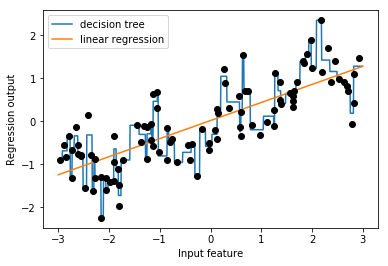

In [14]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")
plt.show()

線形モデルを連続データに対してより強力にする方法の一つとして特徴量のビニングと離散化がある．<br>
これは特徴量を複数の特徴量に分割する方法である

In [17]:
bins = np.linspace(-3, 3, 11)

print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [20]:
which_bin = np.digitize(X, bins = bins)

print("\nData points:\n", X[:5])
print("\nBin membership for data points\n", which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [21]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)

print(X_binned[:5])

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [22]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


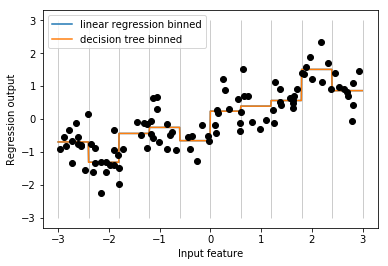

In [23]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.show()

線形回帰と決定木が完全に同じ予測を行っており，線形モデルに関してはより柔軟に，決定木に対しては柔軟性が低下している．<br>

一般に特徴量をビニングすることは決定木に対してメリットが無い．<br>
あるデータセットに対して線形モデルを使う必要がある場合(例えばデータが大きくて，高次元な場合)に幾つかの特徴量が出力と非線形な関係を持つようならビニングを使うとモデルの表現力を増強することができる．<br>

# 相互作用と多項式

特徴量表現をより豊かにするもう一つの方法として，特に線形モデルに有効なもの

- 交互作用特徴量
- 多項式特徴量

を加えること．

特徴量を加えれば、傾きにも変化が現れる。

In [38]:
X_combined = np.hstack([X, X_binned])

print("X_combined")
print(X_combined)

X_combined
[[-0.75275929  0.          0.         ...,  0.          0.          0.        ]
 [ 2.70428584  0.          0.         ...,  0.          0.          1.        ]
 [ 1.39196365  0.          0.         ...,  1.          0.          0.        ]
 ..., 
 [-0.43475389  0.          0.         ...,  0.          0.          0.        ]
 [-2.84748524  1.          0.         ...,  0.          0.          0.        ]
 [-2.35265144  0.          1.         ...,  0.          0.          0.        ]]


In [37]:
print("X_combined shape:{}".format(X_combined.shape))

X_combined shape:(100, 11)


hstackは、numpy配列を結合してくれる。

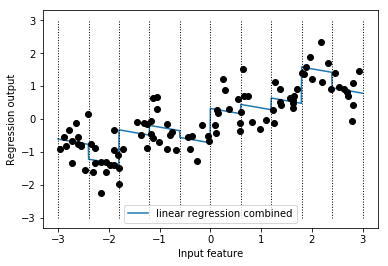

In [31]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')
plt.show()

In [39]:
X_product = np.hstack([X_binned, X * X_binned])

print("X_product shape:{}".format(X_product.shape))

X_product shape:(100, 20)


In [66]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ":", c = "k")

plt.plot(X[:, 0], y, 'o', c='k')
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [100, 1000]

- ビニング
    - 連続値特徴量の拡張
- 多項式
    - ある特徴量xに対して, x^2, x^3と考える
    - PolynomialFeaturesとして実装済

In [41]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [42]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


In [43]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[ -7.52759287e-01   5.66646544e-01  -4.26548448e-01   3.21088306e-01
   -2.41702204e-01   1.81943579e-01  -1.36959719e-01   1.03097700e-01
   -7.76077513e-02   5.84199555e-02]
 [  2.70428584e+00   7.31316190e+00   1.97768801e+01   5.34823369e+01
    1.44631526e+02   3.91124988e+02   1.05771377e+03   2.86036036e+03
    7.73523202e+03   2.09182784e+04]
 [  1.39196365e+00   1.93756281e+00   2.69701700e+00   3.75414962e+00
    5.22563982e+00   7.27390068e+00   1.01250053e+01   1.40936394e+01
    1.96178338e+01   2.73073115e+01]
 [  5.91950905e-01   3.50405874e-01   2.07423074e-01   1.22784277e-01
    7.26822637e-02   4.30243318e-02   2.54682921e-02   1.50759786e-02
    8.92423917e-03   5.28271146e-03]
 [ -2.06388816e+00   4.25963433e+00  -8.79140884e+00   1.81444846e+01
   -3.74481869e+01   7.72888694e+01  -1.59515582e+02   3.29222321e+02
   -6.79478050e+02   1.40236670e+03]]


- 多項式特徴量を線形回帰モデルと組み合わせると、古典的な多項式回帰モデルになる。

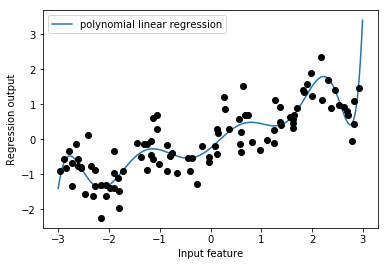

In [44]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")
plt.show()

- 変換していないオリジナルデータを、カーネル法を用いたSVMに適用してみる。

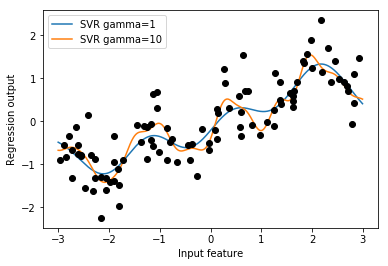

In [47]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma = gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")
plt.show()


- boston_housingデータセットを用いて、特徴量の貢献度等を見ていく。

In [50]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [52]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


- 交互作用を用いてない場合と用いた場合の変化をRidge回帰で見てみる。

In [54]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(
    ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


- ランダムフォレストにおいて

In [56]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.800
Score with interactions: 0.767


# 単変量非線形変換

特徴量を二乗，三乗すること以外にも， log, exp, sinなどの数学関数を用いることでモデルに有用な特徴量を作成できることがある．
log, expなどの関数はデータの相対的なスケールを修正してくれるので，線形モデルやニューラルネットワークモデルでモデリングしやすくなる．sin, cos関数は周期的なパターンをもつ関数を扱うときに有用である．

殆どのモデルは，個々の特徴量がおおよそガウス分布に従っているときに最もうまく機能する．整数のカウントデータに対してlog, expを用いると特に効果的である．

In [57]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt

rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [58]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9 17
  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5  2  1
  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1  0  2  0
  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0  0  0  0  0
  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


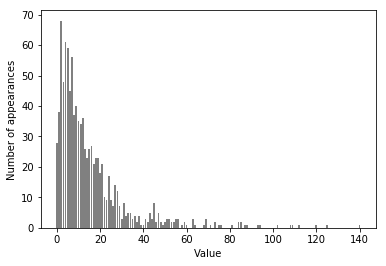

In [59]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")
plt.show()

ポアソン分布になっている

In [60]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)

print("Test score: {:.3f}".format(score))

Test score: 0.622


In [61]:
# log0は定義されていない為+1
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

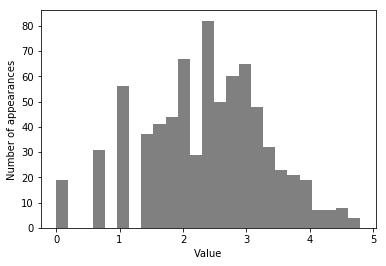

In [62]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")
plt.show()

非対称性が少なく，非常に大きい外れ値はなくなっている(ガウス分布(正規分布)に近くなっている)

In [63]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)

print("Test score: {:.3f}".format(score))

Test score: 0.875


この種の変換は決定木ベースのモデルには関係が無い，線形モデルには強く効く．また回帰モデルの場合はターゲット変数yも変換した方が良い場合がある．

ビニング，多項式，交互作用はあるデータセットに対するモデルの性能に大きな影響を与える．

# 自動特徴量選択

高次元データセットの場合，最も有用な特徴量だけを残して残りを捨て特徴量を減らすと，モデルが単純になり汎化性能が向上する．

よい特徴量を調べるためには

- 単変量統計
- モデルベース選択
- 反復選択

の三つがある．これらは教師あり手法であり，特徴量選択時には訓練セットだけを用いて行う必要がある．

## 単変量統計

単変量統計では，個々の特徴量とターゲットの間に統計的に顕著な関係があるかどうかを計算する．そして最も高い確信度で関連している特徴量が選択される．クラス分類の場合は`分散分析`(ANOVA)と知られている．この方法の特性は`単変量`であることであり，他の特徴量と組み合わさって意味を成すような特徴量は捨てられてしまう．

つまり、特徴量とターゲットの関係を重視

In [67]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

# ノイズを加える
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)

select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


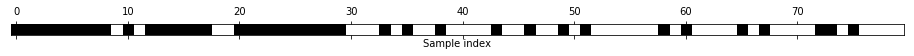

In [73]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap = "gray_r")
plt.xlabel("Sample index")
plt.yticks(())
plt.show()

In [72]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
    lr.score(X_test_selected, y_test)))

Score with all features: 0.930
Score with only selected features: 0.940


## モデルベース特徴量

モデルベース特徴量洗濯は，教師あり学習モデルを用いて個々の特徴量の重要性を判断し，重要なものだけを残す手法である．
単変量選択の場合とは対して，モデルベースの選択は，全ての特徴量を同時に考慮するので変数間の相互作用を捉えることが出来る

つまり、単変量解析とは違って特徴量のみを重視

In [74]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

SelectFromModelクラスは教師あり学習モデルで得られた特徴量の重要性が，指定したスレッショルドよりも大きい特徴量だけを選択する．

In [75]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


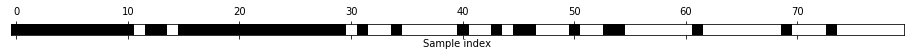

In [76]:
mask = select.get_support()
# 黒が真， 白が偽
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())
plt.show()

In [77]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


## 反復特徴量選択

- 単変量統計
    - モデルを全く使わない
- モデルベース選択
    - モデルを一つ使う
- 反復特徴量選択
    - 異なる特徴量を用いた一連のモデルを作る
    
反復特徴量では全く特徴量を使わないところから，ある基準が満たされるところまで特徴量を一つずつ加えていく方法と，<br>
全ての特徴量を使う状態から一つずつ取り除いていく方法の2つの方法がある．<br>
この方法の一つが`再帰的特徴量削減`(PFE)である．<br>
この方法は全ての特徴量から開始してモデルを作り，そのモデルで最も重要度が低い特徴量を削除する．<br>

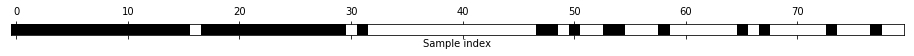

In [78]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)

mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())
plt.show()

In [79]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


In [80]:
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.951
